In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [21]:
df.head(5)

,gender,race/ethnicity,parental level of education,school_lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
df.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.shape

(1000, 8)

In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [20]:
df=df.rename(columns = {
    'lunch':'school_lunch'
})

In [14]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [15]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
df.sample(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
533,female,group E,associate's degree,standard,completed,79,88,94
354,female,group C,some college,standard,none,59,71,70
917,female,group C,high school,standard,none,44,61,52


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.dropna()

In [22]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [24]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Text(0, 0.5, 'Number of Students')

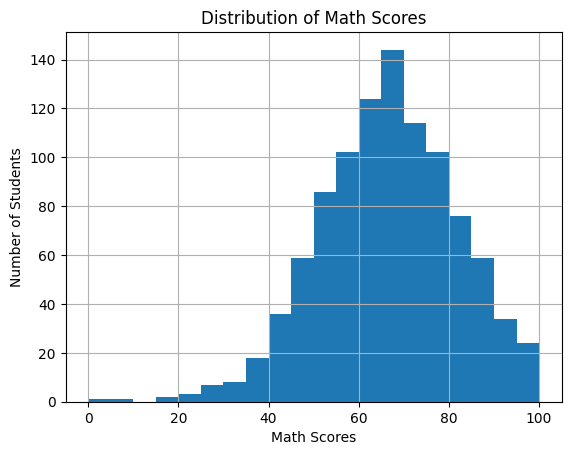

In [28]:
df['math score'].hist(bins=20)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Scores')
plt.ylabel('Number of Students')

([<matplotlib.patches.Wedge at 0x10f3f1e80>,
 [Text(-0.062170487413935493, 1.0982416994881927, 'female'),
  Text(0.062170321584051766, -1.0982417088756626, 'male')],
 [Text(-0.03391117495305572, 0.5990409269935596, '51.8%'),
  Text(0.03391108450039187, -0.5990409321139978, '48.2%')])

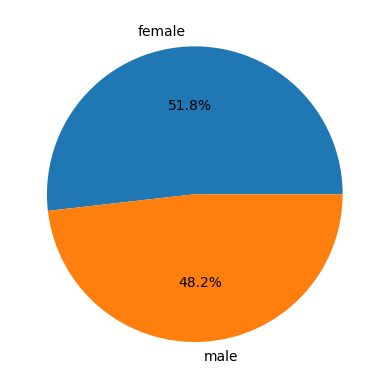

In [33]:
gender_counts = df['gender'].value_counts()

plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%')

In [34]:
df.groupby('parental level of education')['math score'].mean()

parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64

In [36]:
df['average_score'] = df(['math score', 'reading score', 'writing score']).mean(axis=1)

TypeError: 'DataFrame' object is not callable

In [ ]:
df['passed'] = df['average_score'] >= 60

KeyError: 'average score'

In [41]:
df['passed'].value_counts()

KeyError: 'passed'

In [42]:
df.groupby('parental level of education')['average_score'].mean().sort_values()

KeyError: 'Column not found: average_score'

In [43]:
df.to_csv("StudentsPerformance_modified.csv", index = False)